In [2]:
import numpy as np
import pandas as pd
from math import *
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_weights(input_size, hidden_size, output_size):
    weights1 = np.random.randn(input_size, hidden_size) * 0.01
    weights2 = np.random.randn(hidden_size, output_size) * 0.01
    return weights1, weights2

In [4]:
def forward_propagation(X, weights1, weights2):
    hidden_layer = sigmoid(np.dot(X, weights1))
    output_layer = sigmoid(np.dot(hidden_layer, weights2))
    return hidden_layer, output_layer

def calculate_error(y, output_layer):
    # Adding a small epsilon to avoid log(0) error
    epsilon = 1e-12
    output_layer = np.clip(output_layer, epsilon, 1. - epsilon)  # Clipping the output to avoid extreme values
    cross_entropy_loss = -np.mean(y * np.log(output_layer) + (1 - y) * np.log(1 - output_layer))
    return cross_entropy_loss

def backward_propagation(X, hidden_layer, output_layer, y, weights2):
    error = output_layer - y 
    hidden_error = np.dot(error, weights2.T) * hidden_layer * (1 - hidden_layer) 
    
    weights1_update = np.dot(X.T, hidden_error)
    weights2_update = np.dot(hidden_layer.T, error)
    
    return weights1_update, weights2_update

def update_weights(weights1, weights2, weights1_update, weights2_update, learning_rate):
    weights1 -= learning_rate * weights1_update
    weights2 -= learning_rate * weights2_update
    return weights1, weights2
    
# Training function
def train(X, y, hidden_size, learning_rate, epochs):
    input_size = X.shape[1]
    output_size = y.shape[1]
    weights1, weights2 = initialize_weights(input_size, hidden_size, output_size)
    
    for i in range(epochs):
        hidden_layer, output_layer = forward_propagation(X, weights1, weights2)
        loss = calculate_error(y, output_layer)
        # print(f'Epoch {i+1}/{epochs}, Loss: {loss}')
        weights1_update, weights2_update = backward_propagation(X, hidden_layer, output_layer, y, weights2)
        weights1, weights2 = update_weights(weights1, weights2, weights1_update, weights2_update, learning_rate)
    
    return weights1, weights2, output_layer


In [5]:
data = pd.read_csv('classification_train.csv')
df = data.to_numpy()

In [6]:
data = data.drop(columns=['Unnamed: 0'])

y_train = data['label']

x_train = data.drop(columns=['label'])

# Convert y_train to one-hot encoding
y_train_onehot = pd.get_dummies(y_train)

# Convert to numpy arrays for training
x_train = x_train.to_numpy()
y_train = y_train_onehot.to_numpy()

# Output the shapes to confirm
x_train.shape, y_train.shape

((30000, 784), (30000, 10))

In [7]:
# Learning rate
learning_rate = 1.0e-6
hidden_size = 784
output_size = 10
epochs = 100

In [8]:
weights1, weights2, output_layer = train(x_train, y_train, hidden_size, learning_rate, epochs)

Training Accuracy: 0.7985333333333333
Training Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3000
           1       0.97      0.94      0.95      3000
           2       0.82      0.44      0.57      3000
           3       0.79      0.87      0.83      3000
           4       0.54      0.89      0.67      3000
           5       0.96      0.85      0.90      3000
           6       0.60      0.41      0.49      3000
           7       0.87      0.90      0.88      3000
           8       0.90      0.95      0.93      3000
           9       0.88      0.93      0.91      3000

    accuracy                           0.80     30000
   macro avg       0.81      0.80      0.79     30000
weighted avg       0.81      0.80      0.79     30000



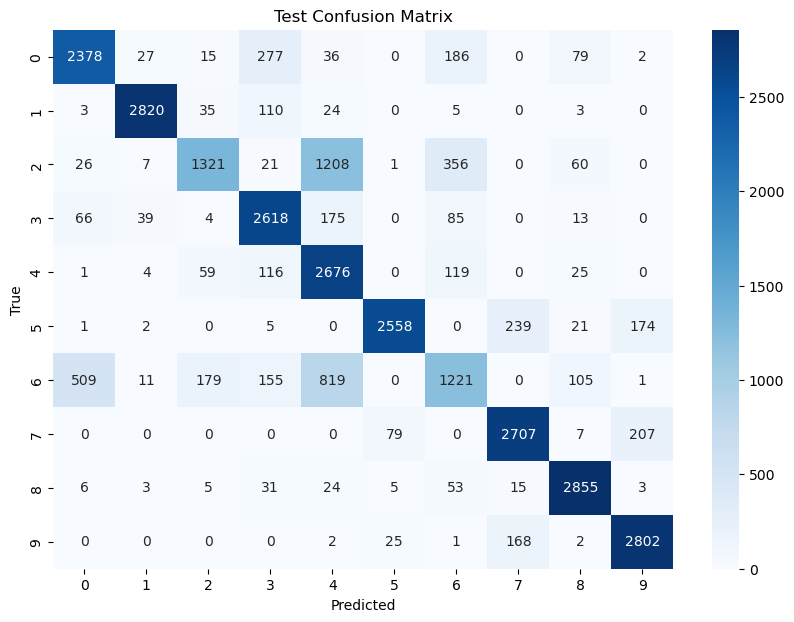

In [9]:
hidden_layer_train, output_layer_train = forward_propagation(x_train, weights1, weights2)
train_predictions = np.argmax(output_layer_train, axis=1)
train_labels = np.argmax(y_train, axis=1)

# Training data performance
train_accuracy = accuracy_score(train_labels, train_predictions)
train_conf_matrix = confusion_matrix(train_labels, train_predictions)
train_class_report = classification_report(train_labels, train_predictions)

print(f"Training Accuracy: {train_accuracy}")
print("Training Classification Report:")
print(train_class_report)

# Plot confusion matrix for test data
plt.figure(figsize=(10,7))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix')
plt.show()

In [10]:
test_data = pd.read_csv('classification_test.csv')
x_test = test_data.iloc[:, 1:785].to_numpy()

In [11]:
z = np.dot(x_test, weights1)
z2 = sigmoid(z)
z3 = np.dot(z2, weights2)
output = sigmoid(z3)
print(f"Largest Prediction index for each row: {np.argmax(output, axis=1)}")

Largest Prediction index for each row: [0 1 2 ... 8 8 4]
